In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("dailytemp.csv", index_col='DATE',parse_dates=True)

In [4]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2014-01-01 to 2018-12-30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MinTemp  1821 non-null   float64
 1   MaxTemp  1821 non-null   float64
 2   AvgTemp  1821 non-null   float64
 3   Sunrise  1825 non-null   int64  
 4   Sunset   1825 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 85.5 KB


In [6]:
df.isna().sum() # to check null values

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isna().sum() # to check null values

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [9]:
df.describe() #

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821.000000,1821.000000,1821.000000,1821.000000,1821.000000
mean,38.637013,54.515102,46.818781,607.108731,1823.003844
std,3.798284,5.013654,4.143192,40.815966,49.576486
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,49.000000,67.000000,57.000000,700.000000,1905.000000


In [10]:
df.shape

(1821, 5)

<Axes: xlabel='DATE'>

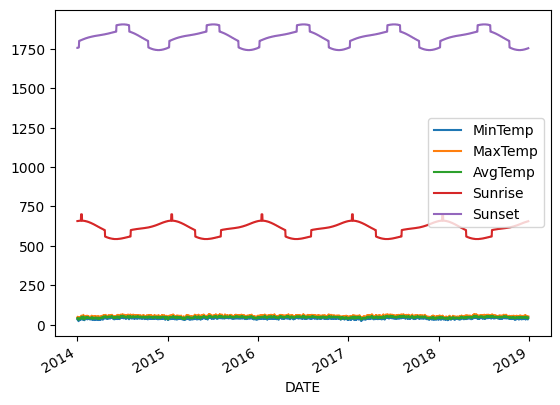

In [11]:
df.plot()

<Axes: xlabel='DATE'>

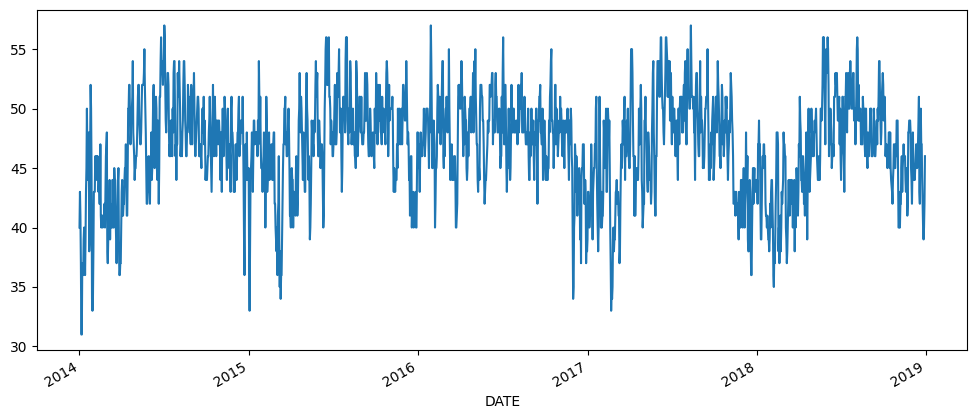

In [12]:
df['AvgTemp'].plot(figsize=(12,5))

In [13]:
from statsmodels.tsa.stattools import adfuller
def adf_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
adf_test(df['AvgTemp'])

1. ADF :  -6.554680125068785
2. P-Value :  8.675937480199322e-09
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 1808
5. Critical Values :
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


If p< 0.05 ; Data is stationary

if p>0.05; Data is not stationary

ARIMA is composed of 3 terms(Auto-Regression + Integrated+Moving-Average)

Auto-Regression:
This basically means that you are using the previous values of the time series in order to predict the future. How many past values you use, determine the order of the AR model. Here’s how an AR(1) model looks like:

Y(t)= Some_Constant*Y(t-1)+ Another_Constant +Error(t)

Simple enough, right?

2. Integrated: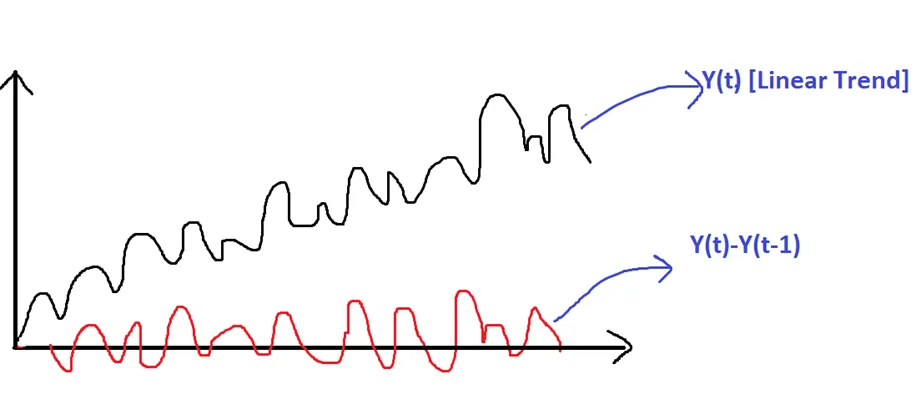

So, remember our talk on stationarity, and how it’s extremely important? Well if you are data set is not stationary, you most often need to perform some sort of difference operation to make it stationary. If you are differencing with previous value, its order 1 and so on. Here’s an example of that:


Forgive my bad drawing. But as you can the series Y(t) was not stationary, because of an increasing trend resulting in a varying mean. We simply subtract it from previous values and voila! It becomes stationary. Depending on your data, you might have to repeat the differencing to get a second order differencing , third order and so on..

3. Moving Average:

This basically means that you are using previous errors to make the future prediction. Also makes sense, right? By seeing how wrong you were in your prediction, you take that into account to make a better prediction. And just like in an AR model, the number of previous errors(also called number of lags) you use, determines the order of the model.

Here’s how MA(1) order equation looks like:
Y(t)= Mean + Some_Constant*Error(t-1) +Error(t)

So our main job is to decide the order of the AR, I, MA parts which are donated by(p,d,q) respectively.

In [1]:
from pmdarima import auto_arima

In [14]:

stepwise_fit = auto_arima(df['AvgTemp'], trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.610, Time=2.21 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.19 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.45 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.221, Time=1.79 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.212, Time=1.85 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.189, Time=2.00 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.657, Time=2.11 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.297, Time=2.47 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.639, Time=2.50 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8305.878, Time=2.63 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [ ]:
stepwise_fit.summary() # sarimax = arima with seasonality

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.134
Date:                Wed, 04 Dec 2024   AIC                           8294.268
Time:                        00:56:10   BIC                           8338.325
Sample:                             0   HQIC                          8310.522
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1617      0.352      3.296      0.001       0.471       1.852
ar.L1          0.9751      0.008    128.504      0.000       0.960       0.990
ma.L1         -0.1285      0.024     -5.448      0.000      -0.175      -0.082
ma.L2         -0.2208      0.024     -9.194      0.000      -0.268      -0.174
ma.L3         -0.2032      0.024     -8.523      0.000      -0.250      -0.156
ma.L4         -0.1377      0.023     -6.055      0.000      -0.182      -0.093
ma.L5         -0.0510      0.024     -2.092      0.036      -0.099      -0.003
sigma2         5.4988      0.172     31.947      0.000       5.161       5.836
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                19.95
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1821, 5)
(1791, 5) (30, 5)


In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [28]:
model=ARIMA(train['AvgTemp'],order=(1,0,5))

d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Wed, 04 Dec 2024   AIC                           8156.395
Time:                        01:04:37   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index = df.index[start:end+1]
print(pred)


DATE
2018-12-01    44.754109
2018-12-02    44.987795
2018-12-03    45.388741
2018-12-04    45.721545
2018-12-05    45.863733
2018-12-06    45.874126
2018-12-07    45.884370
2018-12-08    45.894466
2018-12-09    45.904417
2018-12-10    45.914225
2018-12-11    45.923891
2018-12-12    45.933419
2018-12-13    45.942809
2018-12-14    45.952063
2018-12-15    45.961185
2018-12-16    45.970175
2018-12-17    45.979036
2018-12-18    45.987770
2018-12-19    45.996377
2018-12-20    46.004861
2018-12-21    46.013222
2018-12-22    46.021463
2018-12-23    46.029586
2018-12-24    46.037591
2018-12-25    46.045481
2018-12-26    46.053258
2018-12-27    46.060923
2018-12-28    46.068477
2018-12-29    46.075923
2018-12-30    46.083261
Name: ARIMA Predictions, dtype: float64


d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='DATE'>

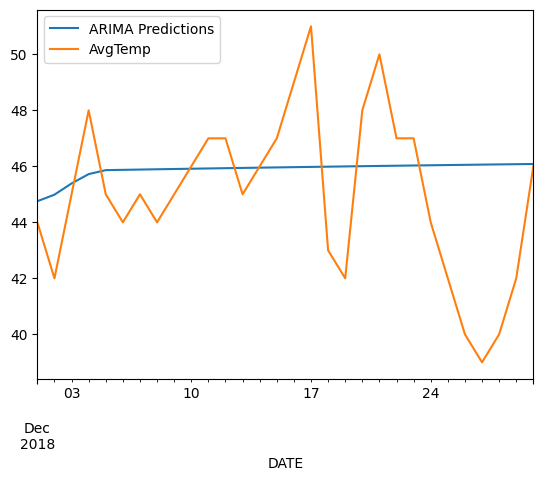

In [27]:
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463874115708


In [30]:
test['AvgTemp'].mean()

45.0

In [31]:
model2 = ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753
2018-12-29,36.0,47.0,42.0,655,1753
2018-12-30,39.0,52.0,46.0,656,1754


In [34]:
idex_future_dates = pd.date_range(start='2018-12-30', end='2019-01-28')
pred_= model2.predict(start=len(df), end=len(df)+30,typ='levels').rename('arima prediction')
pred.index = idex_future_dates

d:\a27_YEARS_OLD\timeseries\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [35]:
pred

2018-12-30    44.754109
2018-12-31    44.987795
2019-01-01    45.388741
2019-01-02    45.721545
2019-01-03    45.863733
2019-01-04    45.874126
2019-01-05    45.884370
2019-01-06    45.894466
2019-01-07    45.904417
2019-01-08    45.914225
2019-01-09    45.923891
2019-01-10    45.933419
2019-01-11    45.942809
2019-01-12    45.952063
2019-01-13    45.961185
2019-01-14    45.970175
2019-01-15    45.979036
2019-01-16    45.987770
2019-01-17    45.996377
2019-01-18    46.004861
2019-01-19    46.013222
2019-01-20    46.021463
2019-01-21    46.029586
2019-01-22    46.037591
2019-01-23    46.045481
2019-01-24    46.053258
2019-01-25    46.060923
2019-01-26    46.068477
2019-01-27    46.075923
2019-01-28    46.083261
Freq: D, Name: ARIMA Predictions, dtype: float64

<Axes: >

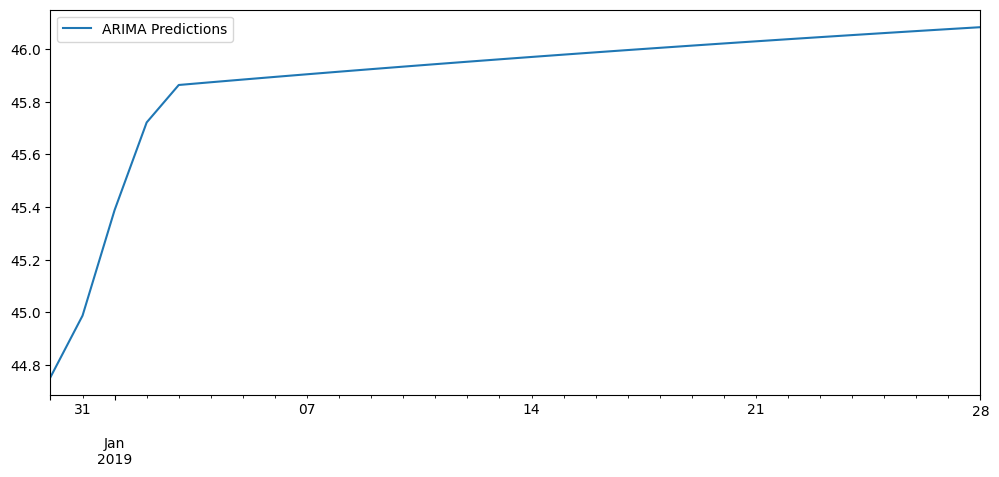

In [36]:
pred.plot(figsize=(12,5),legend=True)